# Assignment 1

## Name: TJ ZHANG

### Collaborators: Steven Kim


# Notes

Submit your homework by uploading it in the directory with your name. Please mention in this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." 
Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. 
To complete your homework, you may ONLY consult the following material: 
1.	lecture slides
2.	course notes you or others took during lecture.
3.	the required text (CLRS)
4.	websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems.

Deadline

Please provide an answer to the following questions: 

# Question 1 (10 pts)

Create a script that: 
1. loads the iris dataset.
2. scales the independent features.
3. computes the correlation coefficients and co-variance among all pairs of independent features.
4. computes the PCA and shows the principal components (their coefficients) 
5. computes the correlation coefficient between each original feature and the new features generated by the PCA 


In [366]:
import pandas as pd

1. loads the iris dataset.

In [367]:
irisdata=pd.read_csv('iris.csv',header=0)
irisdata.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
irisdata=irisdata.drop(columns=['class'])

irisdata.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. scales the independent features.

In [368]:
from sklearn import preprocessing
irisdata_scaled = preprocessing.scale(irisdata)
irisdata_scaled = pd.DataFrame(irisdata_scaled,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
irisdata_scaled.head(10)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


3. computes the correlation coefficients and co-variance among all pairs of independent features.

In [369]:
irisdata_scaled.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [370]:
irisdata_scaled.cov()

,sepal length,sepal width,petal length,petal width
sepal length,1.006711,-0.110103,0.877605,0.823443
sepal width,-0.110103,1.006711,-0.423338,-0.358937
petal length,0.877605,-0.423338,1.006711,0.969219
petal width,0.823443,-0.358937,0.969219,1.006711


4. computes the PCA and shows the principal components (their coefficients) 

In [371]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
irisPCA=PCA(n_components=4).fit(irisdata_scaled)
print(irisPCA.components_)
print(irisPCA.explained_variance_)
print(irisPCA.explained_variance_ratio_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]
[0.72770452 0.23030523 0.03683832 0.00515193]


5. computes the correlation coefficient between each original feature and the new features generated by the PCA 

In [372]:
irisPCA1=PCA(n_components=4).fit_transform(irisdata_scaled)
irisPCAdata=pd.DataFrame(irisPCA1,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
#irisPCAdata[:,0].corr(irisdata_scaled[:,0])
print('The corr of sepal length:',irisdata_scaled['sepal length'].corr(irisPCAdata['sepal length']))
print('The corr of sepal width:',irisdata_scaled['sepal width'].corr(irisPCAdata['sepal width']))
print('The corr of petal length:',irisdata_scaled['petal length'].corr(irisPCAdata['petal length']))
print('The corr of petal width:',irisdata_scaled['petal width'].corr(irisPCAdata['petal width']))

The corr of sepal length: 0.8912244788933588
The corr of sepal width: 0.8883514811883374
The corr of petal length: 0.05408377932564526
The corr of petal width: -0.0751570818219271


# Question 2 (5 pts + (5 pts Extra))

1. What you can observe by comparing the results in Question 1 sections 4 and 5?
2. Can you define any property indicated by these results?
3. If there is any property are you able to formally prove it? (5 extra pts)

Solution: 

1. As we can learn from section 4, the Percentage of variance explained by each of the selected components after PCA is [0.72770452 0.23030523 0.03683832 0.00515193], which means the first two features counts a heavy part and can be considered as  principal components. So it is no wired that before and after PCA, the correlation coefficients in the first two features are still quite high than the others.


2. In my work, I choose **n_components=4** to keep all the features reserved. However, as we know, we want to decrease the dimension from 4 to **k** and at the same time decreasing the noise. But we do not know what the **k** should be. Thus, the correlation coefficient between each original feature and new features generated by the PCA can be used as a symbal to show if the feature could be kept as the main feature. This is because if the correlation coefficient is high, that means this feature does not lose its weight in the PCA after denoising. Therefore, we can use the correlation coefficient between each original feature and new feature as an index to decide how many components should be kept. There, we define a property: if the correlation coefficient between each original feature and new feature is larger than 0.5, we kept this feature. In this case, the  **n_components** should be 2.






3. In scikit-learn, we can not only choose our number of components like **n_components=4**, but also we can decide the accuracy after using PCA like **n_components=0.9**, which means after using PCA, the components decreased from 4 to k, and the information is reserved 90%. We use this sentence in this case to prove that our property is right.

In [383]:
irisPCA=PCA(n_components=0.9).fit(irisdata_scaled)
print(irisPCA.components_)
print(irisPCA.explained_variance_)
print(irisPCA.explained_variance_ratio_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
[2.93035378 0.92740362]
[0.72770452 0.23030523]


3. As we can see above, the first two components are kept after using PCA. That is the same result from our property. And it can also be proved by the following equation. 



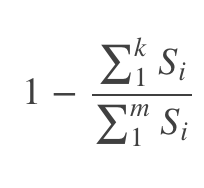

This function shows how much information reserved [reference](https://blog.csdn.net/ybdesire/article/details/64546435). k is the selected number of components, m=k+1.
In our case, when k = 2, the result of this equation is: 

In [397]:
1-(0.72770452+0.23030523)/(0.72770452+0.23030523+0.03683832)

0.03702909128627041

That means only 0.037% of information was lost in the PCA procedure. That means k=2 is good enough that it does not lose lot of information but reduce the noise.

# Question 3 (10 pts)

1) Write code in pure python (Numpy and Scipy are allowed, SciKit is Not) to implement a decision tree. In input, you should provide the independent features and the dependent feature (the class) separately.
You can assume that the dependent features and the independent feature are binary. Please implement the Gini index and the entropy gain ratio. You can read the code available online, but you cannot plagiarize it.

2) Create a toy example to run and test your code (please show the result).



In [394]:
import numpy as np
import pandas as pd
'''
color: 1-black  vs  0-white
Length: 1-long  vs  0-short
Depth: 1- deep vs 0-shallow
Class: 1-yes vs 0-no

This dataset is a toy example used to test my decision tree code!
'''
traindata = pd.DataFrame([[0, 1 ,1,1],[1, 1, 0,1],[0,0,1,1],[1,0,1,0],[0,1,0,1],
                          [0,1,1,1],[1,0,0,1],[1,1,1,1],[1,0,0,1],[0,1,1,1]],columns=['Color','Length','Depth','Class'])
traindata

,Color,Length,Depth,Class
0,0,1,1,1
1,1,1,0,1
2,0,0,1,1
3,1,0,1,0
4,0,1,0,1
5,0,1,1,1
6,1,0,0,1
7,1,1,1,1
8,1,0,0,1
9,0,1,1,1


In [395]:
def gini_index(X_train):
    '''
    To calculate the gini index of each feature
    
    '''
    retList = []
    for c in X_train.columns[0:-1]:
        
        
        c1 = X_train['Class'][X_train[c] == 1]
        
        c2 = X_train['Class'][X_train[c] == 0]
        
        p1 = c1.sum()/c1.count()
        

        p2 = c2.sum()/c2.count()
        
        
        score1 = p1*(1-p1)
        
        score2 = p2*(1-p2)
        
        
        gini = (c1.count()*score1+c2.count()*score2)/(c1.count()+c2.count())
       
        retList.append(gini)
        
    return retList

def getGainratio(X_train):
    '''
    To calculate the Gain Ratio of each feature
    
    '''
    retList = []
    
    for c in X_train.columns[0:-1]:
        total_1 = len(X_train[X_train[c] == 1])
        total_0 = len(X_train[X_train[c] == 0])

        p1 = X_train['Class'][X_train[c] == 1][X_train['Class'] == 1].count()/total_1
        p2 = X_train['Class'][X_train[c] == 0][X_train['Class'] == 0].count()/total_0
        
        ent1 = -p1*np.log2(p1+1e-9) -(1-p1)*np.log2(1-p1+1e-9)
        ent0 = -p2*np.log2(p2+1e-9) -(1-p2)*np.log2(1-p2+1e-9)
        
        
        p_all = X_train['Class'].sum()/X_train['Class'].count()
        
        entall= -p_all*np.log2(p_all+1e-9) -(1-p_all)*np.log2(1-p_all+1e-9)
        
        gain = entall - (total_1/(total_1+total_0)*ent1+total_0/(total_1+total_0)*ent0)
        
        
        IV = -total_1/(total_1+total_0)*np.log2(total_1/(total_1+total_0))-total_0/(total_1+total_0)*np.log2(total_0/(total_1+total_0))
        
        gain_ratio = gain/IV
        
        retList.append(gain_ratio)
        
    return retList

def choosethebestfeature(traindata,index):
    
    '''
    index = 0: use Gini index as a metrix
    index = 1: Use Entropy Gain ratio as a metrix
    
    '''
    if index == 0:
        #get gini
        gini = gini_index(traindata)
        #return the location of the largest gini value
        feature_index=gini.index(max(gini))
    else:
        gainratio = getGainratio(traindata)
        feature_index=gainratio.index(min(gainratio))
    #get the largest feature
    feature_list = traindata.columns.values.tolist()
    best_feature = feature_list[feature_index]
    return best_feature,feature_index

def splitdata(traindata,best_feature,h):
    #divide dataset into two subdataset
    #delete the best_feature column
    subDataset=[]
    #subDataset1=[]
    n=len(traindata[best_feature])#n=5 Get length of Color column
    data=traindata[best_feature]
    subData = traindata[traindata[best_feature]==h].drop(columns=[best_feature])
    #subData0 = traindata[traindata[best_feature]==0].drop(columns=[best_feature])
    #print('subDataset1',subDataset1)
    return subData


In [396]:
def node(traindata,index,n):
    result={}

    best_feature,feature_index=choosethebestfeature(traindata,index)#choose the best feature of the traindata
    #print(best_feature,feature_index)
    subData=splitdata(traindata,best_feature,n)#get the sub dataset after split
    #result[best_feature]=n
    
    return subData,best_feature

def creat_tree(traindata):
    
    for n in range(2):
        if len(traindata.columns)>2:
        
                
            '''
            index = 0: use Gini index as a metrix
            index = 1: Use Entropy Gain ratio as a metrix

            '''
            subData,best_feature=node(traindata=traindata,index=1,n=n)
            print('------------------------')
            print('Node:',best_feature,'=',n)
            print('------------------------')
            #print(subData)

            creat_tree(subData)
            
        else:
        
            best_feature = traindata.columns[0]
            subData=splitdata(traindata,best_feature,n)
            
            print('------------------------')
            print('End Node:',best_feature,'=',n)
            print('------------------------')
            print(subData)

    return 
    
creat_tree(traindata)


------------------------
Node: Depth = 0
------------------------
------------------------
Node: Color = 0
------------------------
------------------------
End Node: Length = 0
------------------------
Empty DataFrame
Columns: [Class]
Index: []
------------------------
End Node: Length = 1
------------------------
   Class
4      1
------------------------
Node: Color = 1
------------------------
------------------------
End Node: Length = 0
------------------------
   Class
6      1
8      1
------------------------
End Node: Length = 1
------------------------
   Class
1      1
------------------------
Node: Depth = 1
------------------------
------------------------
Node: Color = 0
------------------------
------------------------
End Node: Length = 0
------------------------
   Class
2      1
------------------------
End Node: Length = 1
------------------------
   Class
0      1
5      1
9      1
------------------------
Node: Color = 1
------------------------
------------------

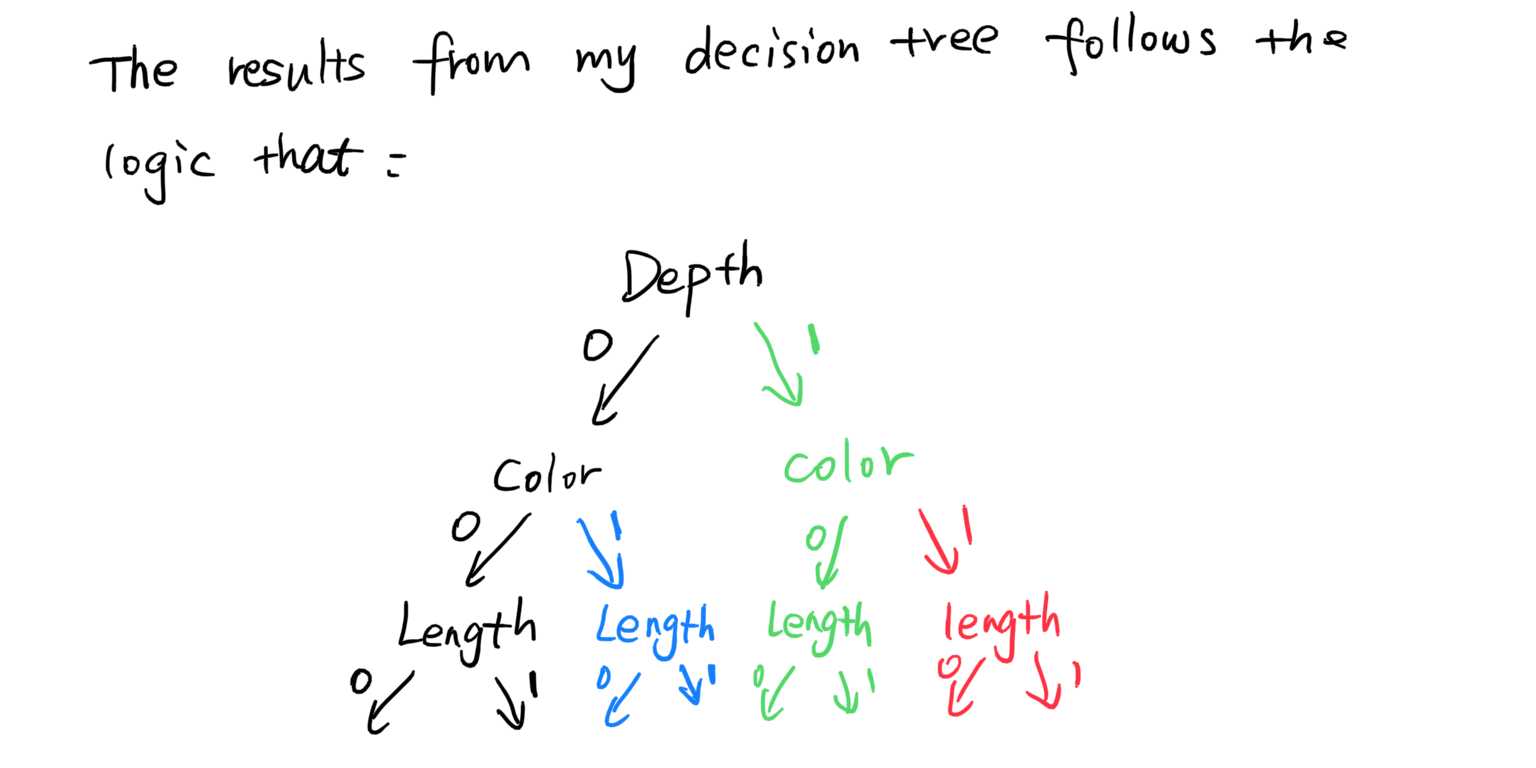

The sequence of running outputs starting from: black -> blue -> green -> red. And in each end node, I give the class subset.